In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'

In [2]:
import sys
sys.path.append('../')

from PIL import Image, ImageOps

from source.augmentations import get_transforms, Stages
from source.dataset import create_tvi_data

2022-10-01 00:09:57.757399: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from pathlib import Path
from typing import List, Tuple, Union, Dict, Optional
import random
import numpy as np

def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

SEED = 42

TRAIN_IMAGE_SIZE = 1024
INFER_IMAGE_SIZE = 1632
TRAIN_FOLDER = f"../datasets/4-whololooo/train/"
VALID_FOLDER = f"../datasets/4-whololooo/valid/"
INFER_FOLDER = f"../datasets/infer"

train_data, valid_data, infer_data = create_tvi_data(
    train_folder=TRAIN_FOLDER,
    valid_folder=VALID_FOLDER,
    infer_folder=INFER_FOLDER,
    train_transform=get_transforms(TRAIN_IMAGE_SIZE, Stages.TRAIN),
    valid_transform=get_transforms(INFER_IMAGE_SIZE, Stages.VALID),
    infer_transform=get_transforms(INFER_IMAGE_SIZE, Stages.INFER),
)

/usr/local/lib/python3.9/dist-packages/albumentations/augmentations/transforms.py:1639: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/albumentations/augmentations/transforms.py:1613: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/albumentations/imgaug/transforms.py:263: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)


In [5]:
import multiprocessing as mp
from tqdm import trange

def worker(index):
    name = train_data.filenames[index].split('.')[0]
    for i in range(explode):
        item = train_data[index]
        Image.fromarray(item['image']).save(f"{target}/images/{name}_{i}.png")
        Image.fromarray(item['mask']*255).convert('L').save(f"{target}/masks/{name}_{i}.png")
    print(f'Done: {index}')


target = '../datasets/5-augmented/train'
os.makedirs(f"{target}/images", exist_ok=True)
os.makedirs(f"{target}/masks", exist_ok=True)
explode = 2

with mp.Pool(mp.cpu_count()) as pool:
    pool.map(worker, np.arange(len(train_data)))
    pool.close()
    pool.join()

2022-10-01 00:10:41.171140: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-01 00:10:41.171255: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 6b4bce4bf2d4
2022-10-01 00:10:41.171400: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 6b4bce4bf2d4
2022-10-01 00:10:41.171681: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.141.3
2022-10-01 00:10:41.171760: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.141.3
2022-10-01 00:10:41.171769: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.141.3
2022-10-01 00:10:41.173489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instr

2022-10-01 00:10:41.591548: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-01 00:10:41.591631: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 6b4bce4bf2d4
2022-10-01 00:10:41.591646: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 6b4bce4bf2d4
2022-10-01 00:10:41.591980: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.141.3
2022-10-01 00:10:41.592074: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.141.3
2022-10-01 00:10:41.592091: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.141.3
2022-10-01 00:10:41.593261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instr

2022-10-01 00:10:41.795958: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-01 00:10:41.796045: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 6b4bce4bf2d4
2022-10-01 00:10:41.796055: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 6b4bce4bf2d4
2022-10-01 00:10:41.796372: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.141.3
2022-10-01 00:10:41.796451: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.141.3
2022-10-01 00:10:41.796459: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.141.3
2022-10-01 00:10:41.797590: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instr

Done: 248
Done: 156
Done: 160
Done: 184
Done: 252
Done: 68
Done: 100
Done: 72
Done: 176
Done: 144
Done: 128
Done: 112
Done: 20
Done: 80
Done: 152
Done: 253
Done: 157
Done: 185
Done: 124
Done: 161
Done: 249
Done: 196
Done: 204
Done: 84
Done: 24
Done: 44
Done: 216
Done: 104
Done: 200
Done: 224Done: 192

Done: 88
Done: 40Done: 168

Done: 140
Done: 164
Done: 212
Done: 8
Done: 92
Done: 48Done: 172

Done: 220
Done: 76
Done: 108
Done: 136
Done: 56Done: 132

Done: 0Done: 188

Done: 36
Done: 120
Done: 52
Done: 240Done: 96

Done: 244
Done: 64
Done: 4
Done: 60
Done: 148
Done: 12
Done: 228Done: 254

Done: 28
Done: 32Done: 158

Done: 236
Done: 250
Done: 16Done: 186

Done: 116
Done: 180
Done: 162
Done: 208
Done: 232
Done: 69
Done: 255
Done: 177
Done: 159
Done: 163
Done: 187
Done: 251
Done: 153
Done: 21
Done: 81
Done: 101
Done: 73
Done: 205
Done: 225
Done: 113
Done: 145
Done: 193
Done: 221
Done: 141
Done: 201
Done: 45
Done: 137
Done: 217
Done: 105Done: 9
Done: 256

Done: 129
Done: 264
Done: 61Done: 2

  4%|████▋                                                                                                                   | 31/790 [02:03<50:13,  3.97s/it]

KeyboardInterrupt



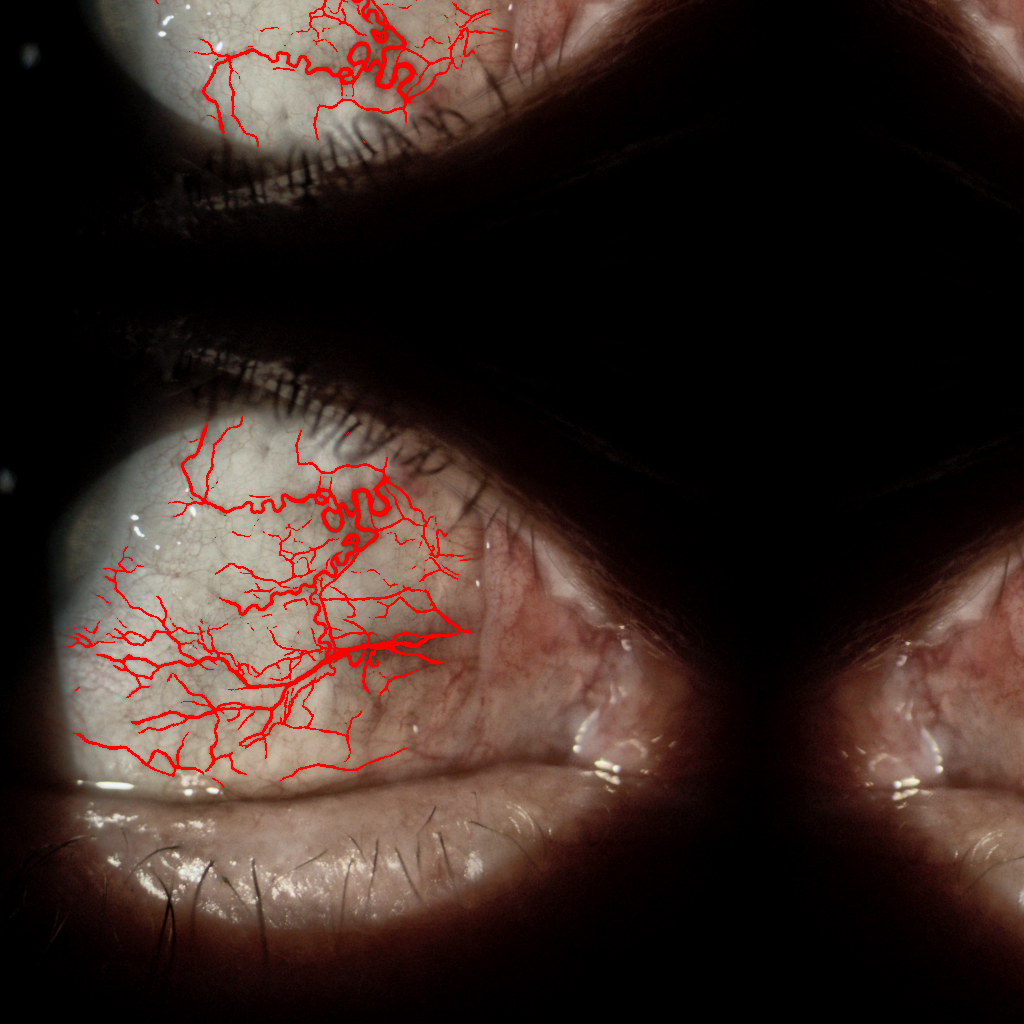

In [59]:
item = train_data[np.random.randint(len(train_data))]

Image.composite(Image.fromarray(item['image']), Image.new("RGB",item['image'].shape[:2], (255,0,0)), Image.fromarray(255-255*item['mask']))

In [3]:
image = valid_data[0]['image'].astype(np.uint8)

2022-09-22 22:10:50.793868: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-22 22:10:50.793943: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 6b4bce4bf2d4
2022-09-22 22:10:50.793952: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 6b4bce4bf2d4
2022-09-22 22:10:50.794181: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.141.3
2022-09-22 22:10:50.794243: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.141.3
2022-09-22 22:10:50.794251: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.141.3
2022-09-22 22:10:50.795409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instr

In [4]:
def imshow_augment(augmentor, item, mask_color=(255,0,0), show='imo'):
    auged = augmentor(**item)
    im = Image.fromarray(auged['image'])#.show()
    m = Image.fromarray(255-auged['mask']*255)#.show()
    over = Image.composite(im, Image.new('RGB', im.size, mask_color), m)
    if 'i' in show:
        im.show()
    if 'm' in show:
        m.show()
    if 'o' in show:
        over.show()
#     Image.fromarray(augmentor(**item)['image']).show()
    

In [5]:
from enum import Enum, auto

class Stages(Enum):
    TRAIN = auto()
    VALID = auto()
    INFER = auto()


def get_transforms(size: int, stage: Stages) -> A.Compose:
    transforms_list = [
        A.CLAHE(always_apply=True),
    ]

    if stage is Stages.TRAIN:
        transforms_list += [
            A.GaussNoise(var_limit=(1, 200), p=.25),
            A.OneOf([
                A.HueSaturationValue(p=1),
                A.ColorJitter(p=1),
                A.ChannelShuffle(p=1)
            ], p=.25),
            A.OneOf([
                A.RandomBrightnessContrast(p=1),
                A.RandomGamma(p=1)
            ], p=.25),
            A.ShiftScaleRotate(shift_limit=.4, scale_limit=(-.2,1.),p=1),
        ]
    transforms_list += [
        A.LongestMaxSize(size, always_apply=True),
        A.PadIfNeeded(size, size, always_apply=True),
    ]
    return A.Compose(transforms_list)

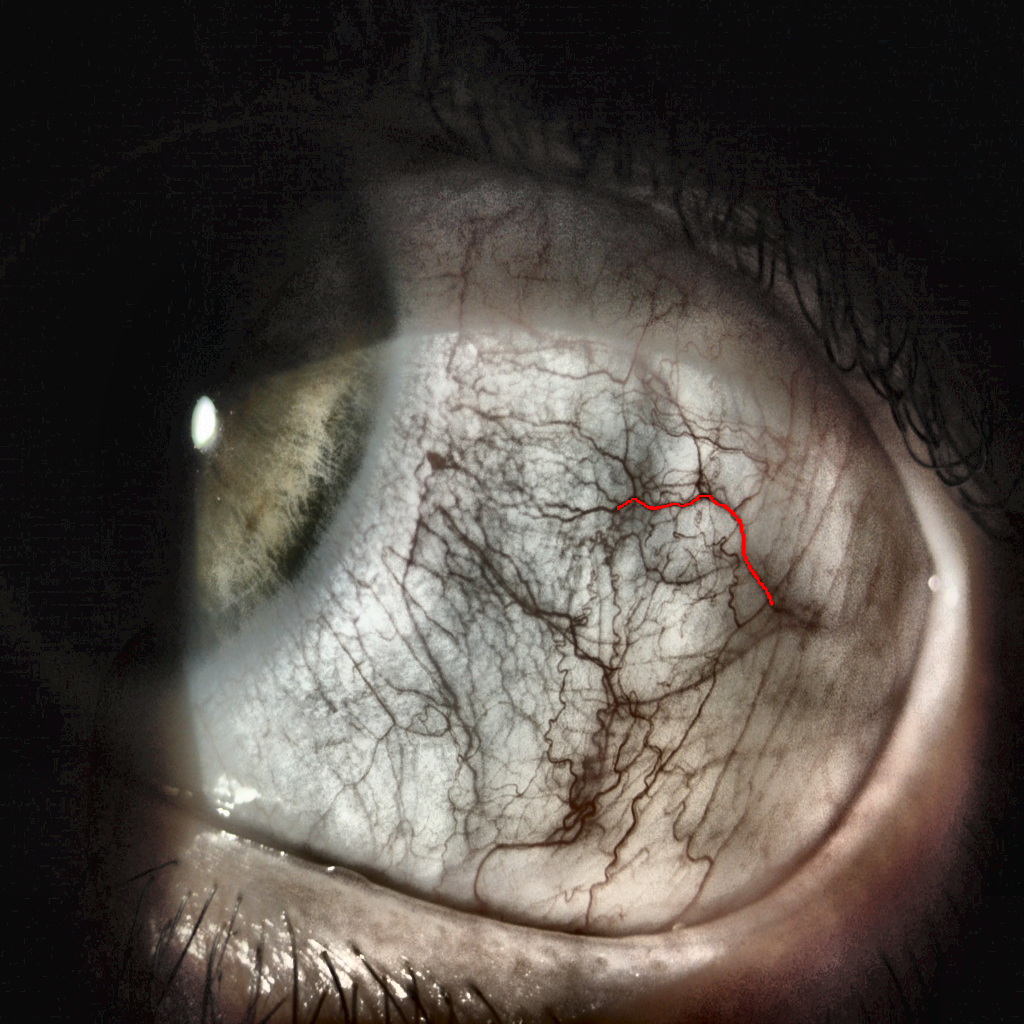

In [9]:
index = np.random.randint(len(valid_data))
item = valid_data[index]
size=1024
imshow_augment(get_transforms(size, Stages.INFER), item, show='o')

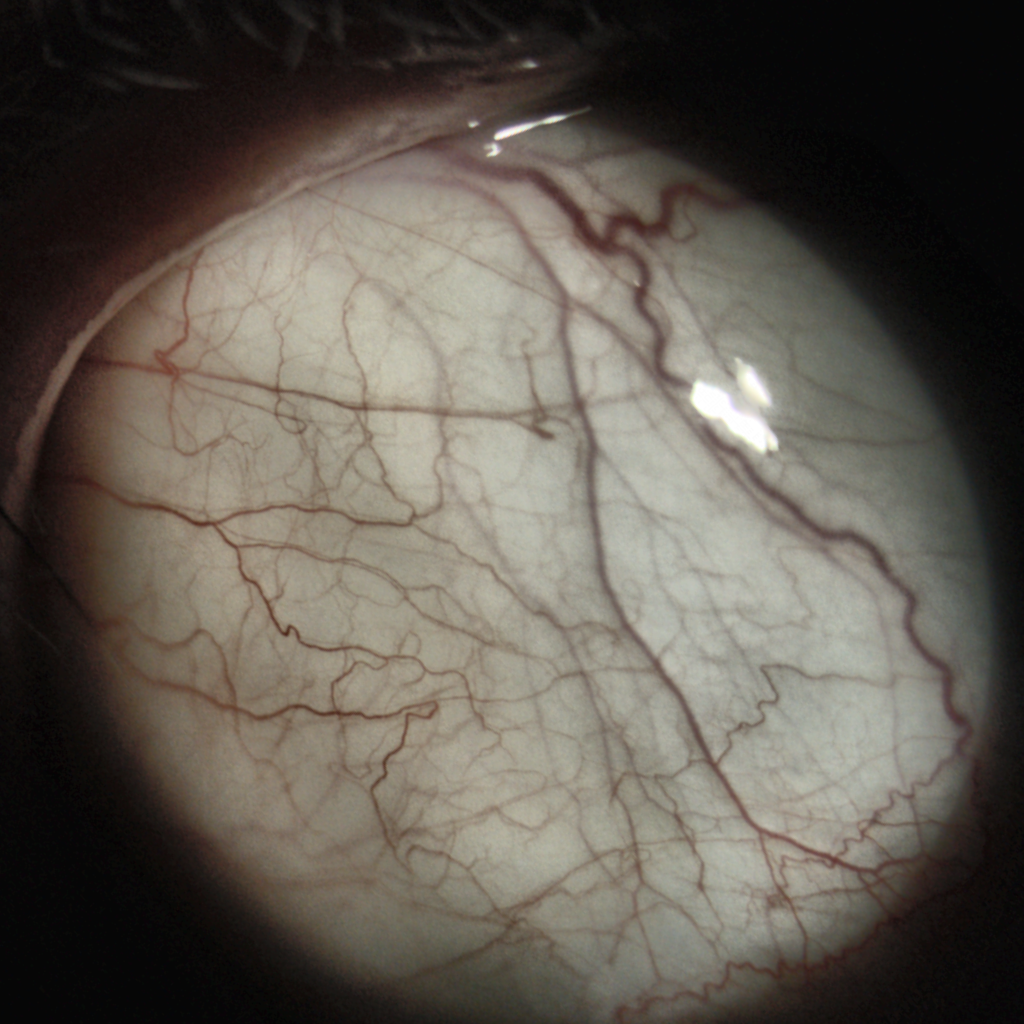

In [177]:

Image.fromarray(A.ShiftScaleRotate(shift_limit=.4, scale_limit=(-.2,1.),p=1)(**item)['image'])

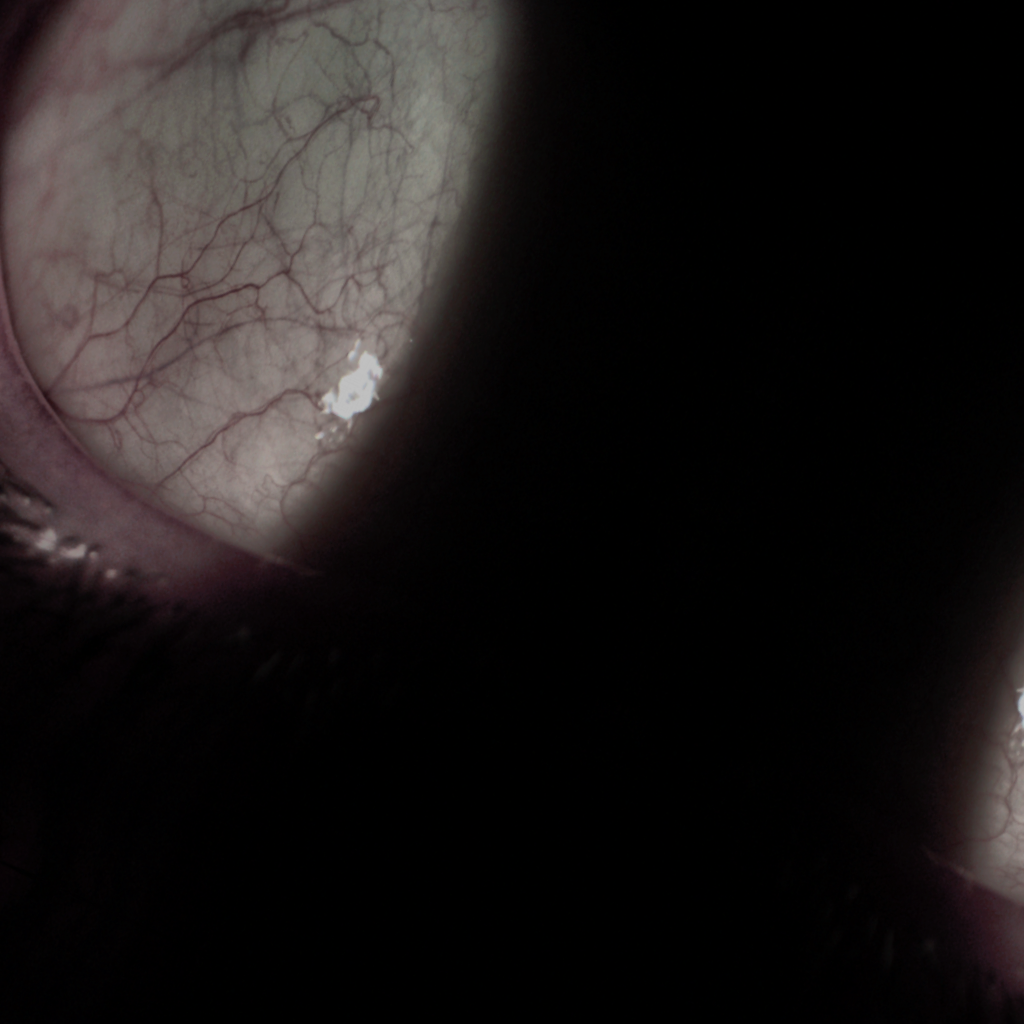

In [8]:
from PIL import Image

Image.fromarray(train_data[np.random.randint(len(train_data))]['image'].astype(np.uint8)).resize([INPUT_IMAGE_SIZE,INPUT_IMAGE_SIZE])